<a href="https://colab.research.google.com/github/andresanchetta/Aulas_Udemy/blob/main/Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EXERCÍCIOS PYTHON

##Regressão Linear

Este exercício consiste em obter uma previsão do valor de Investimento Inicial de uma franquia, identificado na tabela de dados por ```CusInic```, a partir da variável referente a Taxa Anual cobrada pelo franqueador, indicado na tavela de dados por ```FrqAnual```.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [34]:
url_dados = 'https://raw.githubusercontent.com/andresanchetta/Aulas_Udemy/main/Dados/slr12.csv'
dados = pd.read_csv(url_dados, sep=';')
dados.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [ ]:
dados.shape

(36, 2)

Em aula foram apresentados dois modelos para se obter a regressão linear, pelo metodo da biblioteca ```sklearn.linear_model``` e pela biblioteca ```statsmodels.formula.api```.  

In [ ]:
#Cria-se inicialmente as variaveis X e Y para o modelo de regressão:
x = dados.iloc[:,0].values #Valores de Taxa Anual da Franquia
y = dados.iloc[:,1].values #Valores de Custo Inicial
correlacao = np.corrcoef(x,y)
correlacao

array([[1.        , 0.47700725],
       [0.47700725, 1.        ]])

Através do cálculo da correlação, sabe-se que ela é positiva, ou seja, conforme aumenta-se X, aumenta-se Y, porém o valor dessa correlação é de aprox ```0.48``` o que nos indica que essa relação esta entre moderada e fraca, portanto a regressão linear não é altamente recomendada nesses casos.  
Mesmo assim, segue a forma de Regressão Linear:


###sklear.linear_model

In [ ]:
#Mudança do formato de x para matrix, necessário para versões recentes do sklearn
x = x.reshape(-1,1)

In [ ]:
#Criamos o modelo e alimentamos nossos dados a ele:
modelo = LinearRegression()
modelo.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Agora para realizar qualquer previsão podemos utilizar:
modelo.predict([[1000]])

array([1240.76215819])

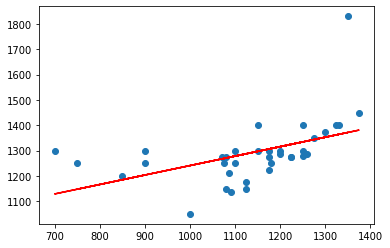

In [36]:
# Geração do gráfico com os pontos reais e as previsões
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color = 'red')

###statsmodels.formula.api

In [ ]:
#Criação do modelo através da biblioteca:
modelo_ajustado = sm.ols(formula = 'CusInic ~FrqAnual', data = dados)
modelo_treinado = modelo_ajustado.fit() #Não é necessario fornecer dados, pois ja foram fornecidos na criação do modelo
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                CusInic   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     10.01
Date:                Mon, 10 May 2021   Prob (F-statistic):            0.00327
Time:                        19:37:12   Log-Likelihood:                -219.47
No. Observations:                  36   AIC:                             442.9
Df Residuals:                      34   BIC:                             446.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    867.6042    135.071      6.423      0.000     593.107    1142.102
FrqAnual       0.3732      0.118      3.165      0.003       0.134       0.613
==============================================================================
Omnibus:                       32.231   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.481
Skew:                           1.975   Prob(JB):                     1.12e-21
Kurtosis:                       9.979   Cond. No.                     8.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Podemos então substituir valores na equação da reta:

$p = b + (m * v)$
 

**$p$** é a previsão desejada;  
**$b$** é a intercecção com o eixo 0;  
**$m$** é o coeficiente angular da reta.  

In [ ]:
867.6042 + 0.3732 * 1000 #Mesmo valor utilizado na previsão anterior

1240.8042